In [1]:
from google.colab import files
import io
import os
import pandas as pd
from google.colab import drive
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
from numpy.polynomial.polynomial import polyfit
from mpl_toolkits import mplot3d
from scipy.stats import boxcox
from matplotlib import pyplot
from numpy import exp
from functools import reduce
from PIL import Image
import cv2 as cv
from google.colab.patches import cv2_imshow
import time
from datetime import datetime, timedelta
import dateutil.parser
from dateutil.parser import parse
import glob
import ee

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
!pip install geopandas
!pip install geemap
!pip install rasterio
import rasterio
import geopandas as gpd
import geemap.eefolium as geemap
import geemap

In [2]:
# Authenticate the Google earth engine with google account
ee.Authenticate()
ee.Initialize()

NameError: name 'ee' is not defined

In [ ]:
lat, long = 44.201128, -78.556023
size = 0.06
cords = [[long-1.5*size, lat+size], [long-1.5*size, lat-size], 
         [long+1.5*size, lat-size], [long+1.5*size, lat+size]]
aoi = ee.Geometry.Polygon(cords, None, False) #order is longitude then latitude. 

dataset = ee.Image('USGS/SRTMGL1_003') # 30 m pixels, could not download the file.
elevation = dataset.select('elevation');
slope = ee.Terrain.slope(elevation);
aspect = ee.Terrain.aspect(elevation)
shade = ee.Terrain.hillshade(elevation) 
clipped_elev = elevation.clip(aoi)
clipped_slope = slope.clip(aoi)
clipped_aspect = aspect.clip(aoi)

vis_elev = {'min': 200,'max': 350,'palette': ['blue', 'green', 'orange',  'red']}
vis_slope = {'min': 0,'max':10,'palette': ['blue', 'green', 'orange',  'red']}
sentinel2 = ee.ImageCollection("COPERNICUS/S2_SR");
image = sentinel2.filterBounds(aoi).filterDate('2021-12-10' , '2021-12-15').mosaic().clip(aoi)

Map = geemap.Map(zoom= 12)
Map.addLayer(image, {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 3000}, 'true color')
Map.addLayer(clipped_slope, vis_slope, 'slope')
Map.addLayer(clipped_elev, vis_elev, 'dem')
image = sentinel2.filterBounds(aoi).filterDate('2021-12-10' , '2021-12-15').mosaic().clip(aoi)
Map.addLayer((image.select('B8').subtract(image.select('B4')))\
             .divide(image.select('B4').add(image.select('B8'))),
             {'min': -0.3, 'max': 0.99, 'palette': ['red', 'orange', 'yellow', 'green']}, 'NDVI')
Map.setCenter(long, lat)
Map

Map(center=[44.201128, -78.556023], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBo…

In [ ]:
geemap.ee_export_image(clipped_elev, filename='image.tif', scale=30)  

Generating URL ...
Please wait ...
Data downloaded to /content/image.tif


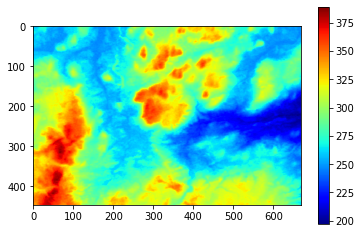

In [ ]:
def to_array(name, figsize = (12, 10)):
  '''return array image from rio object'''
  img_array = name.read(1)
  img_array = img_array.astype('f4')
  img_array[img_array==0] = np.nan
  return img_array

fp = '/content/image.tif'
elev = rasterio.open(fp)
elev = to_array(elev)
plt.imshow(elev, cmap='jet')
plt.colorbar();

In [ ]:
elev

array([[260., 259., 258., ..., 249., 250., 251.],
       [257., 257., 256., ..., 249., 250., 252.],
       [256., 256., 256., ..., 247., 248., 250.],
       ...,
       [342., 342., 342., ..., 267., 264., 262.],
       [342., 343., 343., ..., 267., 264., 262.],
       [343., 343., 344., ..., 266., 264., 261.]], dtype=float32)